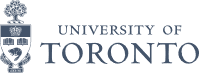

# Session 4b: Anomaly Detecction using One Class SVM


# Table of Contents
1. A simple oneClass SVM (Support vector machines) (<font color='red'>Unsupervised</font> Outlier Detection)
1. A more sofisticated dxample
1. The Project

# 1. A simple example - how to work with One Class SVM

**A One-Class SVM,** also known as Support Vector Domain Description (SVDD), is a **machine learning algorithm primarily used for anomaly detection**. Unlike traditional SVMs that learn a boundary between two or more classes, a One-Class SVM **learns a boundary that encompasses the majority of the training data**, representing the "**normal**" data points.

Here's how it works:

- **Training**: The algorithm is trained on a dataset containing only examples of the normal class. It tries to find a hypersphere (in a high-dimensional space) that encloses as many of these normal data points as possible while minimizing its volume.

- **Prediction**: When presented with new data, the One-Class SVM determines whether a data point falls within the learned hypersphere. Points inside the hypersphere are considered normal, while those outside are classified as anomalies or outliers.

Key Characteristics:

- **Unsupervised Learning**: It only requires data from the normal class, making it suitable for scenarios where labeled anomaly data is scarce or unavailable.
- **Novelty Detection**: It excels at identifying novel or unseen patterns that deviate from the learned normal behavior.
- **Robustness to Outliers**: The nu parameter controls the model's sensitivity to outliers, allowing it to adapt to datasets with varying levels of noise.

Common Applications:

- **Fraud Detection**: Identifying fraudulent transactions that differ from typical patterns.
- **Intrusion Detection**: Detecting unusual network activity that might indicate an attack.
 - **Machine Health Monitoring**: Identifying anomalies in sensor readings that could signal equipment failure.

Overall, One-Class SVM is a powerful tool for anomaly detection when you have a good representation of normal data and want to identify deviations from that norm.

Let's work with a simple example.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Now let's

- **Import pandas**: It imports the pandas library, a powerful tool for data analysis and manipulation in Python.

- **Read CSV File**: It reads a CSV (Comma Separated Values) file from a specified URL using pd.read_csv(). The file contains data related to "cv_server_data" hosted on GitHub.

- **Create DataFrame**: The data from the CSV file is loaded into a pandas DataFrame named df. DataFrames are tabular data structures that allow for easy data manipulation and analysis.



```
import pandas as pd
df=pd.read_csv(r"https://raw.githubusercontent.com/aqibsaeed/Anomaly-Detection/master/cv_server_data.csv",
                   header=None)
```



In [2]:
import pandas as pd
df = pd.read_csv(r"https://raw.githubusercontent.com/aqibsaeed/Anomaly-Detection/master/cv_server_data.csv", header=None)



```
df.shape
```






In [3]:
df.shape

(307, 2)

In [4]:
df.columns = ['Latency','Throughput'] # latency: 延时, throughput: 吞吐量
df.head()

,Latency,Throughput
0,15.790,14.921
1,13.640,15.330
2,14.866,16.474
3,13.585,13.989
4,13.464,15.635




```
plt.figure(figsize=(12,5))
plt.scatter(df['Latency'],df['Throughput'])
plt.show()
```



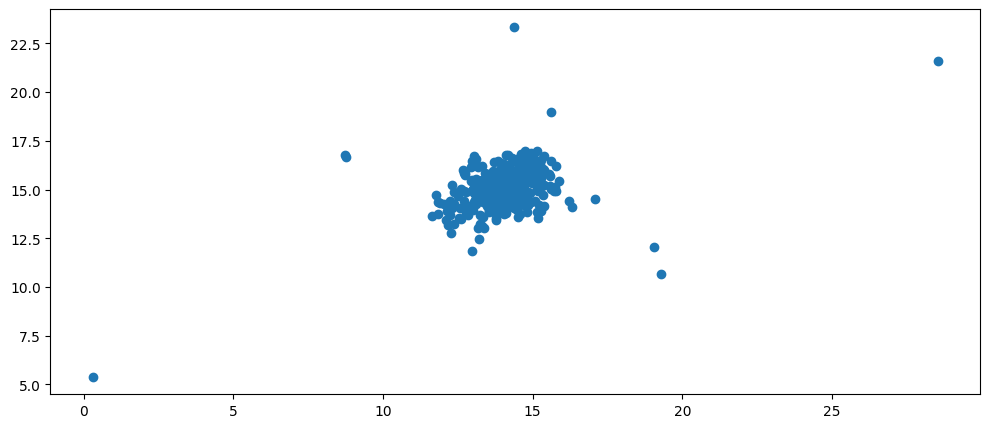

In [5]:
plt.figure(figsize=(12,5))
plt.scatter(df['Latency'], df['Throughput'])
plt.show()

Observation: the outliers could be frauds and intrusion which are considered anomalies.

Now lets,

- **Import OneClassSVM**: It imports the OneClassSVM class from the sklearn.svm module, providing the necessary tools for creating and using a One-Class SVM model.

- **Initialize Model**: It creates an instance of the OneClassSVM model named model with the following parameters:

    - **kernel='rbf':** Specifies the Radial Basis Function (RBF) kernel to transform the data into a higher-dimensional space, allowing for non-linear decision boundaries.
    - **gamma=0.3**: Sets the gamma parameter, which controls the influence of individual training examples on the decision boundary. A **higher gamma value leads to a more complex and tightly fit boundary**.
    - **nu=0.05**: Sets an upper bound on the fraction of training errors and a lower bound on the fraction of support vectors. This parameter balances the model's complexity and its tolerance for outliers.

This code effectively prepares a One-Class SVM model with specific configurations for subsequent training and anomaly detection tasks.

In the context of a One-Class SVM with an RBF kernel, the **gamma parameter plays a crucial role in determining the shape and complexity of the decision boundary**. It essentially controls how far the influence of a single training example reaches.

Think of each training example as exerting a "force field" around itself. The gamma value determines the strength and reach of this force field.

- **Low Gamma**: A small gamma value creates wide and smooth force fields. This leads to a decision boundary that is more general and less sensitive to individual data points. It's suitable for datasets with a lot of noise or when you want to capture broader patterns.

- **High Gamma:** A large gamma value creates narrow and concentrated force fields. This results in a more complex and tightly fit decision boundary, closely following the distribution of individual training examples. It's useful when you have well-separated clusters or need to detect fine-grained anomalies.

Impact on Model Behavior:

- **Overfitting**: A very high gamma can lead to overfitting, where the model becomes too specialized to the training data and performs poorly on new, unseen data.

- **Underfitting**: A very low gamma might cause underfitting, where the model fails to capture the underlying structure of the data and misses potential anomalies.

<font color='blue'> We can consider that a **large gamma will force the model to be very tight** to the samples, and a smaller one would allow more flexibility.

In a One-Class SVM, the nu parameter serves a dual purpose:

- **Upper Bound on Training Errors**: It sets a **limit** on the **proportion** of **training examples that the model is allowed to classify as outliers or anomalies**. For instance, if nu is set to 0.05, the model can tolerate up to 5% of the training data being outside the decision boundary.

- **Lower Bound on Support Vectors**: It also establishes a **minimum fraction of training examples that must be selected as support vectors**. Support vectors are the data points that lie closest to the decision boundary and play a crucial role in defining its shape.

Balancing Act:

The **nu** parameter essentially controls the trade-off between the model's complexity and its tolerance for outliers.

- **Small Nu**: A lower nu value leads to a **tighter decision boundary** that encompasses a smaller portion of the training data. This might result in a more complex model that is sensitive to outliers but potentially **more accurate in identifying true anomalies**.

- **Large Nu**: A higher nu value creates a wider decision boundary, **accepting a larger fraction of training examples as normal**. This can make the model more robust to noise and less prone to overfitting, but it might also miss some genuine anomalies.

<font color='blue'> We can consider the **nu** as reference to the **% of samples to be considered normal**. If nu is high then more values will be considered normal.



```
#lets use a OneClassSVM model
from sklearn.svm import OneClassSVM
model=OneClassSVM(kernel='rbf',gamma=0.3,
                  nu=0.05)
```



In [6]:
# lets use a OneClassSVM model
from sklearn.svm import OneClassSVM
model = OneClassSVM(kernel='rbf', # rbf: radial basis function, non-linear
                    gamma=0.3, # higher, decision boundary more complex, more sensitive to individual points
                    nu=0.05) # smaller, more sensitive to outliers

Lets train the model



```
#train the model
model.fit(df)
```



In [7]:
# train the model
model.fit(df)

OneClassSVM(gamma=0.3, nu=0.05)

Let's predict the outcome



```
#prediction
lbs=model.predict(df)
```



In [8]:
# prediction
lbs = model.predict(df)

Let's plot the results:



```
plt.figure(figsize=(12,5))
plt.scatter(df['Latency'],df['Throughput'],
            c=lbs)
plt.show()
```



In [9]:
lbs

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

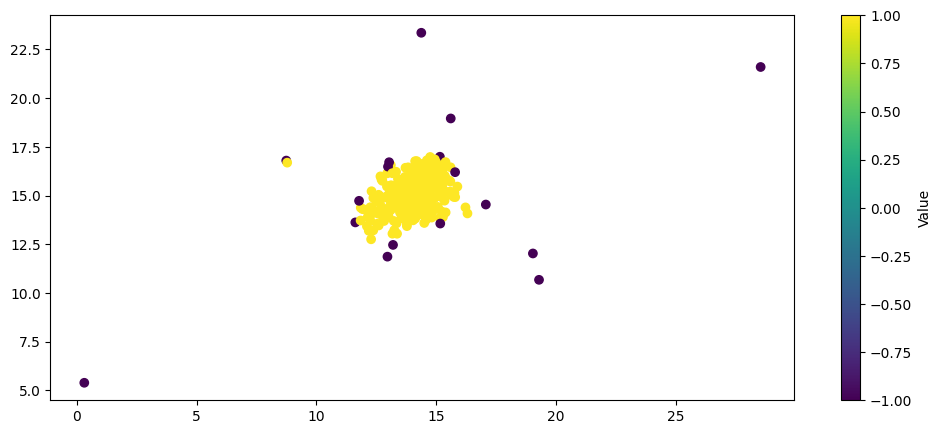

In [10]:
plt.figure(figsize=(12,5))
scatter = plt.scatter(df['Latency'], df['Throughput'], c=lbs) # c=lbs: differentiate between normal and anomaly
plt.colorbar(scatter, label='Value')
plt.show()

# 2. A more sofisticated example

### (1) Import Packages



In [11]:
import matplotlib.font_manager
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm

### (2) Create Grid

We will create a 500 samples 2D grid from -5 to + 5



```
# We create a 2D grid from -5 to 5 with 500 points in each direction
xx, yy = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500))
```



In [12]:
# We create a 2D grid from -5 to 5 with 500 points in each direction
xx, yy = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500)) # meshgrid: creates coordinate matrices (grids) from coordinate vectors

### (3) Generate Train Data

Now we will create 2 random bubbles in (-2,-2) and (2,2)



```
#We created 2 random bubles close to (2,-2) as train data....

# Generate train data
n_train_samples=100;
X = 0.3 * np.random.randn(n_train_samples, 2)
X_train = np.r_[X + 2, X - 2]
```



In [13]:
# We created 2 random bubbles close to (2,-2) as train data....

# Generate train data
n_train_samples = 100
X = 0.3 * np.random.randn(n_train_samples, 2)
X_train = np.r_[X + 2, X - 2]

### (4) Generate Test Data

And also some new samples to apply as a test sample



```
# Generate some regular novel observations
n_test_samples=20;
X = 0.3 * np.random.randn(n_test_samples, 2)
X_test = np.r_[X + 2, X - 2]
```



In [14]:
# Generate some regular novel observations
n_test_samples = 20
X = 0.3 * np.random.randn(n_test_samples, 2)
X_test = np.r_[X + 2, X - 2]

### (5) Generate Outlier

And so, some samples "out of the box" $\rightarrow$ Outliers



```
# Generate some abnormal novel observations
n_outlier_samples=20;
X_outliers = np.random.uniform(low=-4, high=4, size=(n_outlier_samples, 2))
```



In [15]:
# Generate some abnormal novel observations
n_outlier_samples = 20
X_outliers = np.random.uniform(low=-4, high=4, size=(n_outlier_samples, 2))

Let's see how it looks



```
plt.figure(figsize=(12,8));
s = 40
b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c="white", s=s, edgecolors="k")
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c="blueviolet", s=s, edgecolors="k")
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c="gold", s=s, edgecolors="k")
plt.axis("tight")
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend(
    [b1, b2, c],
    [   "training observations",
        "new regular observations",
        "new abnormal observations",
    ],
    loc="upper left",
    prop=matplotlib.font_manager.FontProperties(size=11),
)
plt.xlabel(
    "error train: %d/200 ; errors novel regular: %d/40 ; errors novel abnormal: %d/40"
    % (n_error_train, n_error_test, n_error_outliers)
)
plt.show()
```



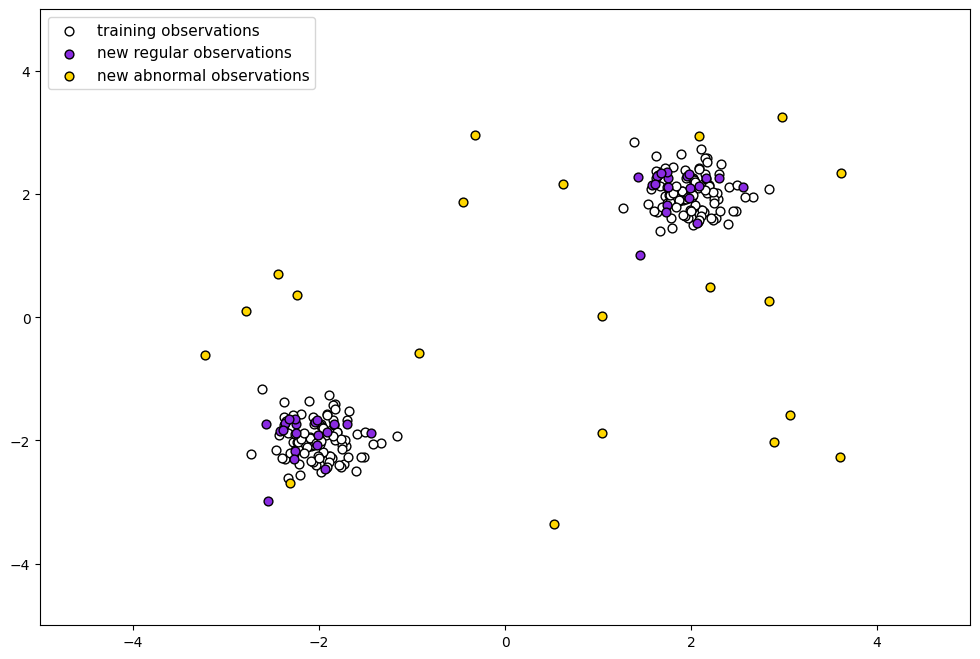

In [16]:
plt.figure(figsize=(12,8));
s = 40
b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c="white", s=s, edgecolors="k")
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c="blueviolet", s=s, edgecolors="k")
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c="gold", s=s, edgecolors="k")
plt.axis("tight")
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend(
    [b1, b2, c],
    [   "training observations",
        "new regular observations",
        "new abnormal observations",
    ],
    loc="upper left",
    prop=matplotlib.font_manager.FontProperties(size=11),
)
#plt.xlabel(
    #"error train: %d/200 ; errors novel regular: %d/40 ; errors novel abnormal: %d/40"
    #% (n_error_train, n_error_test, n_error_outliers))
plt.show()

### (6) Train Support Vector Machine

But with only one class, and not including any outlier in the sample base. So, the SVM will learn to be close to these samples, and just them.



```
# CREATE THE ONE CLASS SVM
clf = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1);
# fit the model
clf.fit(X_train);
```



In [17]:
# CREATE THE ONE CLASS SVM
clf = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
# fit the model
clf.fit(X_train)

OneClassSVM(gamma=0.1, nu=0.1)

### (7) Check Output for Train, Test, Outlier



```
# Predict with the model
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)
```



In [18]:
# Predict with the model
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)

### (8) Check Error



```
n_error_train = y_pred_train[y_pred_train == -1].size
n_error_test = y_pred_test[y_pred_test == -1].size
n_error_outliers = y_pred_outliers[y_pred_outliers == -1].size
print('Out of the surface in train: '+ str(n_error_train/n_train_samples*100) + '%')
print('Out of the surface test: '+ str(n_error_test/n_test_samples*100) + '%')
print('Out of the surface outliers: '+ str(n_error_outliers/n_outlier_samples*100) + '%')
```



In [19]:
n_error_train = y_pred_train[y_pred_train == -1].size
n_error_test = y_pred_test[y_pred_test == -1].size
n_error_outliers = y_pred_outliers[y_pred_outliers == -1].size
print('Out of the surface in train: '+ str(n_error_train/n_train_samples*100) + '%')
print('Out of the surface test: '+ str(n_error_test/n_test_samples*100) + '%')
print('Out of the surface outliers: '+ str(n_error_outliers/n_outlier_samples*100) + '%')

Out of the surface in train: 20.0%
Out of the surface test: 15.0%
Out of the surface outliers: 100.0%


### (9) Apply Decision Function to Grid

```
# plot the line, the points, and the nearest vectors to the plane
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
```



In [20]:
# plot the line, the points, and the nearest vectors to the plane
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]) # decision function: calculate the distance of each sample to decision boundary, distinguish between normal and abnormal data points
Z = Z.reshape(xx.shape)

### (10) Plot Boundaries

```
plt.title("Novelty Detection")
#plt.imshow(Z)
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu)
a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors="darkred")
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors="palevioletred")
plt.axis("tight")
plt.xlim((-5, 5))
plt.ylim((-5, 5))
```

(-5.0, 5.0)

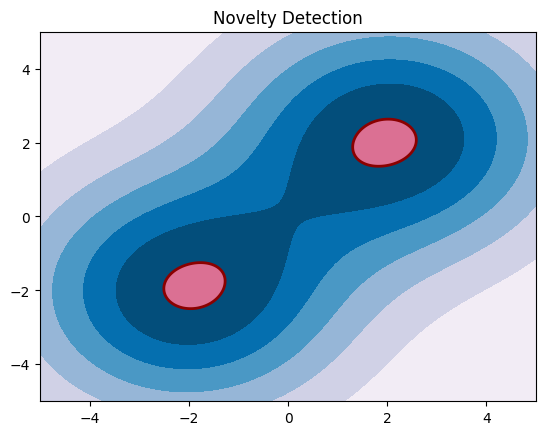

In [21]:
plt.title("Novelty Detection")
# contour plot for decision scores
plt.contourf(xx, yy, Z,
             levels=np.linspace(Z.min(), 0, 7), # specify 7 contour levels from minimum value of Z to zero
             cmap=plt.cm.PuBu) # PuBu colormap

# decision boundary: separates inliers from outliers
a = plt.contour(xx, yy, Z,
                levels=[0], # indicates decision boundary (where decision function equals to 0)
                linewidths=2,
                colors="darkred")

# region for inliers
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors="palevioletred")

plt.axis("tight")
plt.xlim((-5, 5))
plt.ylim((-5, 5))

### (11) Plot Train Data over Boundaries
```
# Plot the training
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu)
a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors="darkred")
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors="palevioletred")
s = 40
b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c="white", s=s, edgecolors="k")
plt.axis("tight")
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.show()
```

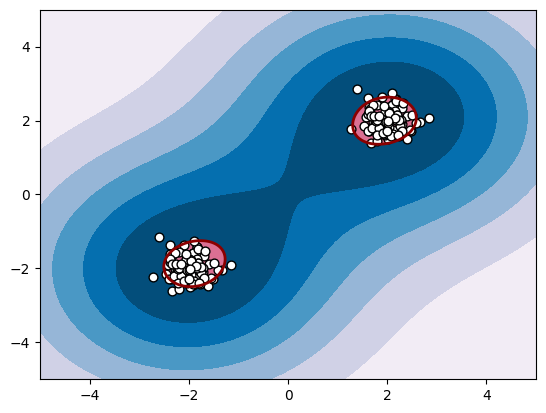

In [22]:
# Plot the training
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu)
a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors="darkred")
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors="palevioletred")
s = 40
b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c="white", s=s, edgecolors="k")
plt.axis("tight")
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.show()

### (12) Plot Test Data over Boundaries
```
# Plot the test
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu)
a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors="darkred")
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors="palevioletred")
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c="blueviolet", s=s, edgecolors="k")
plt.axis("tight")
plt.xlim((-5, 5))
plt.ylim((-5, 5))
```

(-5.0, 5.0)

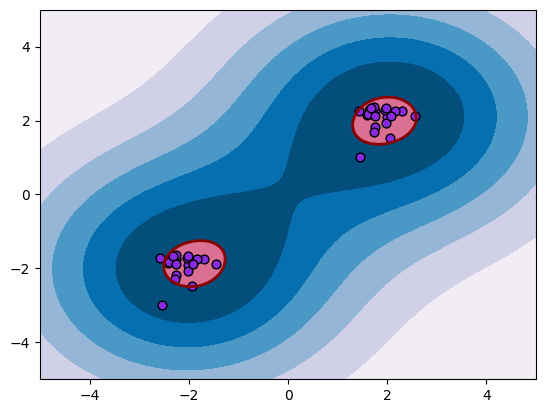

In [23]:
# Plot the test
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu)
a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors="darkred")
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors="palevioletred")
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c="blueviolet", s=s, edgecolors="k")
plt.axis("tight")
plt.xlim((-5, 5))
plt.ylim((-5, 5))

### (13) Plot Outliers over Boundaries
```
# Plot the Outliers
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu)
a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors="darkred")
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors="palevioletred")
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c="gold", s=s, edgecolors="k")
plt.axis("tight")
plt.xlim((-5, 5))
plt.ylim((-5, 5))
```

(-5.0, 5.0)

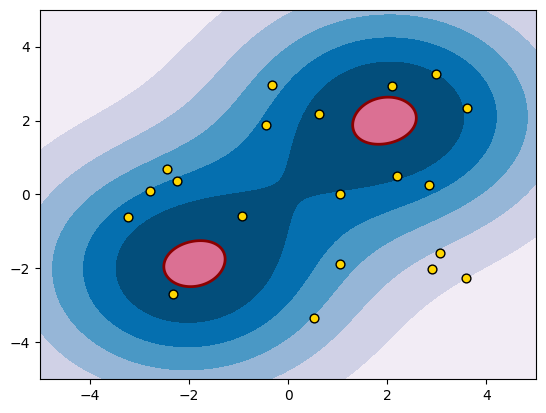

In [24]:
# Plot the Outliers
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu)
a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors="darkred")
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors="palevioletred")
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c="gold", s=s, edgecolors="k")
plt.axis("tight")
plt.xlim((-5, 5))
plt.ylim((-5, 5))

### (14) Plot Train, Test, Outlier together over Boundaries

```
plt.figure(figsize=(19,10))
# plot the line, the points, and the nearest vectors to the plane
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("Novelty Detection")
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu)
a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors="darkred")
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors="palevioletred")

s = 40
b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c="white", s=s, edgecolors="k")
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c="blueviolet", s=s, edgecolors="k")
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c="gold", s=s, edgecolors="k")
plt.axis("tight")
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend(
    [a.collections[0], b1, b2, c],
    [
        "learned frontier",
        "training observations",
        "new regular observations",
        "new abnormal observations",
    ],
    loc="upper left",
    prop=matplotlib.font_manager.FontProperties(size=11),
)
plt.xlabel(
    "error train: %d/200 ; errors novel regular: %d/40 ; errors novel abnormal: %d/40"
    % (n_error_train, n_error_test, n_error_outliers)
)
plt.show()
```



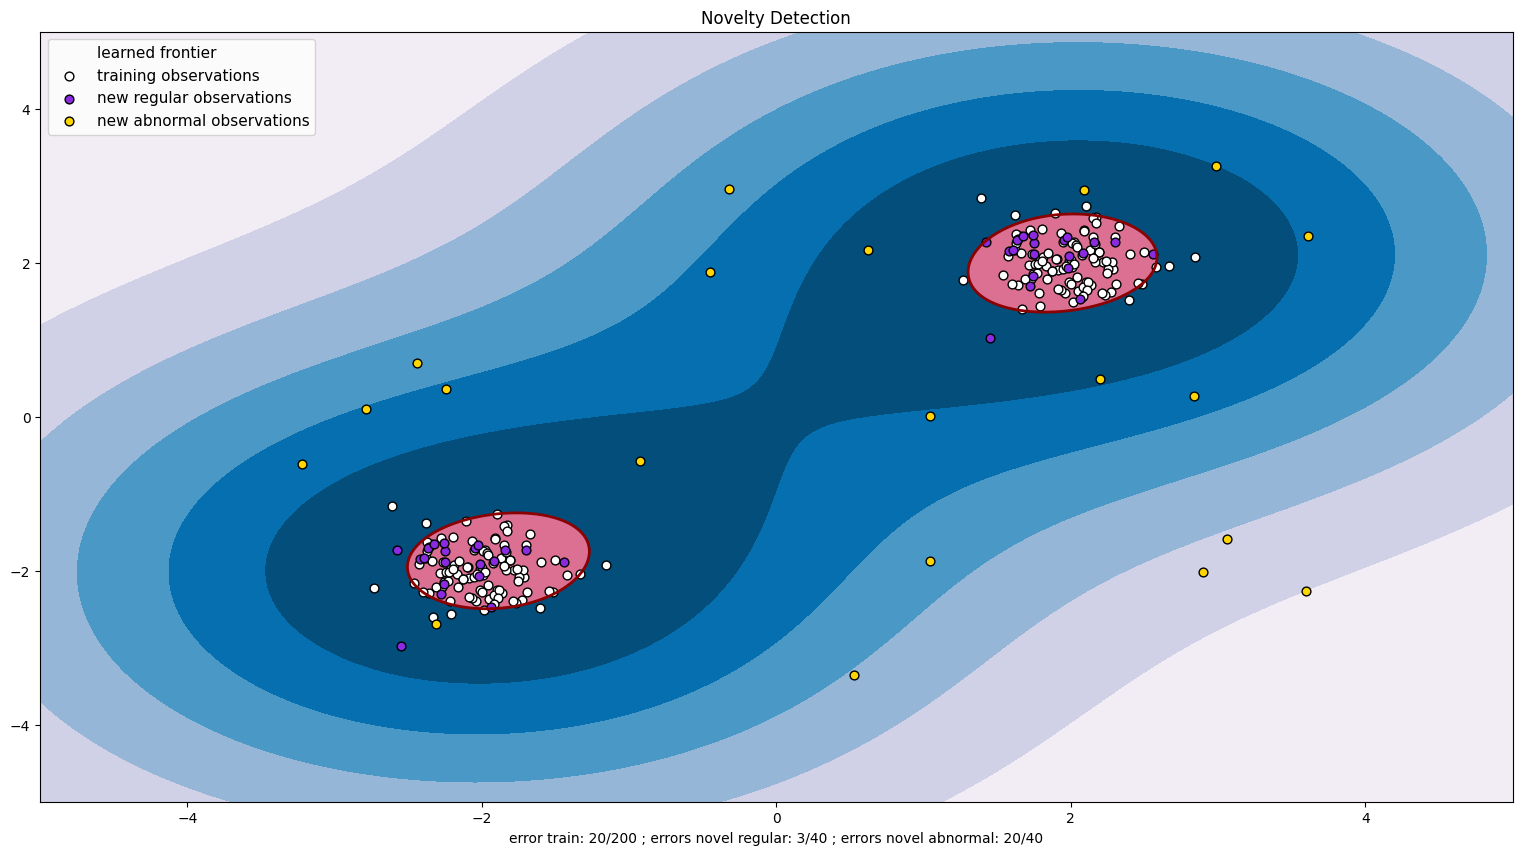

In [25]:
plt.figure(figsize=(19,10))
# plot the line, the points, and the nearest vectors to the plane
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("Novelty Detection")
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu)
a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors="darkred")
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors="palevioletred")

s = 40
b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c="white", s=s, edgecolors="k")
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c="blueviolet", s=s, edgecolors="k")
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c="gold", s=s, edgecolors="k")
plt.axis("tight")
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend(
    [a.collections[0], b1, b2, c],
    [
        "learned frontier",
        "training observations",
        "new regular observations",
        "new abnormal observations",
    ],
    loc="upper left",
    prop=matplotlib.font_manager.FontProperties(size=11),
)
plt.xlabel(
    "error train: %d/200 ; errors novel regular: %d/40 ; errors novel abnormal: %d/40"
    % (n_error_train, n_error_test, n_error_outliers)
)
plt.show()